In [4]:
import pandas as pd
import numpy as np
import re
import gensim
from pythainlp.tokenize import word_tokenize
from pythainlp.corpus import thai_stopwords
from wordcloud import WordCloud
from gensim import corpora, models, similarities
import pyLDAvis
from pprint import pprint
import pickle 
import os
import matplotlib.pyplot as plt
from gensim.models import CoherenceModel
from gensim.test.utils import datapath
import random
from gensim.models.ldamodel import LdaModel
import sklearn
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from gensim.corpora import MmCorpus
import csv
import pyLDAvis.gensim_models as gensimvis
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
RANDOM_STATE = 1

In [5]:
data = pd.read_csv('dataset/DatasetLegal.csv')
with open('model/id2word.pkl', 'rb') as f:
    id2word = pickle.load(f)
with open("lda/topic_dict_5.pkl", "rb") as f:
   topic_dict = pickle.load(f)
with open("lda/lda_model_5.pkl", "rb") as f:
    lda_model = pickle.load(f)
corpus_question = corpora.MmCorpus('model/corpus_question.mm')

str_answer = data['answer'].astype(str)
str_answer = str_answer.map(lambda x: re.sub('[,.!?*#/]', '', x))
str_question = data['question'].astype(str)
str_question = str_question.map(lambda x: re.sub('[,.!?*#/]', '', x))

train_answer = list(str_answer[:5625])
test_answer = list(str_answer[5625:])
train_question = list(str_question[:5625])
test_question = list(str_question[5625:])

In [3]:
def preprocess(text):
  stopwords = list(thai_stopwords())
  read_stopwords = pd.read_csv('dataset/add_stopwords.csv')
  add_stopwords = read_stopwords['stopword'].values.tolist()
  result = []
  str_text = str(text).replace(' ','')
  word_token = word_tokenize(str_text, engine='newmm')
  for word in word_token:
    if(word not in stopwords + add_stopwords):
      result.append(word)
  return result

def bow(text):
  vector = id2word.doc2bow(text)
  return vector

In [27]:
corpus_token = []
train_corpus = train_question+train_answer
for doc in train_corpus:
    corpus_token.append(preprocess(doc))
corpus_str = [' '.join(doc) for doc in corpus_token]
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(corpus_str)
with open('model/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
with open('model/tfidf_matrix.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf_matrix, tfidf_file)

In [28]:
processed_question = [preprocess(x) for x in train_question]
tfidf_matrix = vectorizer.fit_transform(processed_question)
# with open('model/tfidf_matrix.pkl', 'wb') as tfidf_file:
#     pickle.dump(tfidf_matrix, tfidf_file)

query = 'เบื่อจังโว้ย'
preprocessed_query = preprocess(query)
query_vector = tfidf_vectorizer.transform([preprocessed_query])
cosine_similarities = cosine_similarity(query_vector, tfidf_matrix)
most_similar_document_index = cosine_similarities.argmax()

AttributeError: 'list' object has no attribute 'lower'

In [25]:
with open('model/tfidf_matrix.pkl', 'rb') as tfidf_file:
    tfidf_matrix = pickle.load(tfidf_file)

with open('model/tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

# len(vectorizer.get_feature_names())
# similarity_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
# similarity_matrix

array([[1.        , 0.03584374, 0.10632254, ..., 0.1415888 , 0.11266394,
        0.11987219],
       [0.03584374, 1.        , 0.02603306, ..., 0.04420866, 0.03189501,
        0.0573703 ],
       [0.10632254, 0.02603306, 1.        , ..., 0.09494637, 0.12094739,
        0.13636101],
       ...,
       [0.1415888 , 0.04420866, 0.09494637, ..., 1.        , 0.13225561,
        0.16422505],
       [0.11266394, 0.03189501, 0.12094739, ..., 0.13225561, 1.        ,
        0.14465637],
       [0.11987219, 0.0573703 , 0.13636101, ..., 0.16422505, 0.14465637,
        1.        ]])

In [19]:
with open('model/tfidf_matrix.pkl', 'rb') as tfidf_file:
    tfidf_matrix = pickle.load(tfidf_file)

with open('model/tfidf_vectorizer.pkl', 'rb') as vectorizer_file:
    vectorizer = pickle.load(vectorizer_file)

query = ['ครอบครัว', 'การทราบ', 'สมรส']
# query_str = ' '.join(query)
query_tfidf = vectorizer.transform(query)

# Calculate cosine similarity between the query and all documents in the corpus
cosine_similarities = cosine_similarity(query_tfidf, tfidf_matrix).flatten()

# Get the index of the most similar document
most_similar_doc_index = np.argmax(cosine_similarities)

# Print the most similar document's index and cosine similarity score
print("Most similar document index:", most_similar_doc_index)
print("Cosine similarity score:", cosine_similarities[most_similar_doc_index])

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 9184 while Y.shape[1] == 7356

In [ ]:
'''

'''

def tfidf_preprocess(corpus, query):
  corpus_token = []
  for doc in corpus:
    str_text = str(text).replace(' ', '')
    word_token = word_tokenize(str_text, engine='newmm')
    corpus_token.append(word_token)
    corpus_str = [' '.join(doc) for doc in corpus]
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(corpus_str)
  with open('model/tfidf_matrix.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf_matrix, tfidf_file)
  with open('model/tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)
  return X


def keyword_search(query, documents, top_n=5):
  vectorizer = TfidfVectorizer()
  tfidf_matrix = vectorizer.fit_transform(documents + [query])
  cosine_similarities = cosine_similarity(tfidf_matrix[-1], tfidf_matrix[:-1]).flatten()
  top_indices = cosine_similarities.argsort()[-top_n:][::-1]
  results = []
  for idx in top_indices:
      score = cosine_similarities[idx]
      document = documents[idx]
      results.append((document, score))
  return results



In [12]:
preprocessed_corpus

[['มีเรื่อง',
  'ปรึกษา',
  'ครอบครัว',
  'สินสมรส',
  'สินส่วนตัว',
  'การทราบ',
  'ข้อเท็จจริง',
  'วิธีการ',
  'ปฎิบัติ',
  'ดังนี้',
  'เงินเก็บ',
  'สมรส',
  'ล้าน',
  'บาท',
  'สินส่วนตัว',
  'สมรส',
  'ดอกเบี้ย',
  'เงินฝาก',
  'สินสมรส',
  'ข้อตกลง',
  'สัญา',
  'สลักหลัง',
  'ทะเบียนสมรส',
  'ดอกเบี้ย',
  'เกิดขึ้น',
  'สมรส',
  'สินส่วนตัว',
  'เพียงผู้เดียว',
  'ทำได้',
  'สามี',
  'ยินยอม',
  'เซ็นต์',
  'ต่อมา',
  'สามี',
  'บอกเลิก',
  'ล้าง',
  'สมรส',
  'แม่บ้าน',
  'รายได้',
  'สามี',
  'รายได้',
  'บาท',
  'อ้าง',
  'สิทธิ',
  'สินสมรส',
  'แบ่ง',
  'สามี',
  'คนละ',
  'ครึ่ง',
  'สามี',
  'ดำเนิน',
  'การร้องขอ',
  'ศาล',
  'กฎหมาย',
  'มาตรา',
  'เปิดช่อง',
  'ทำได้',
  'รบกวน',
  'เลข',
  'ตรากฎหมาย',
  'อ้างอิง',
  'ศึกษา',
  'ขอโทษ',
  'เห็นแก่ตัว',
  'สามี',
  'เงิน',
  'หญิง'],
 ['บิดา',
  'ลูกติด',
  'มารดา',
  'ลูกติด',
  'บิดา',
  'มารดา',
  'สมร',
  'สมี',
  'บุตร',
  'ตัว',
  'จดทะเบียนสมรส',
  'โฉนดที่ดิน',
  'ชื่อ',
  'บิดา',
  'มารดา',
  'บิดา',
  'เสีย

In [14]:
preprocessed_corpus = []
for i in range(len(train_question)):
    preprocessed_corpus.append(preprocess(train_question[i]))
corpus_str = [' '.join(doc) for doc in preprocessed_corpus]
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = vectorizer.fit_transform(corpus_str)

# Get the feature names (words)
feature_names = vectorizer.get_feature_names_out()

# Convert the TF-IDF matrix to an array
tfidf_array = tfidf_matrix.toarray()

# Print the feature names and the TF-IDF values for each document
for i, document in enumerate(corpus_str):
    print("Document:", i + 1)
    for j, feature in enumerate(feature_names):
        print(feature, ":", tfidf_array[i][j])
    print("=" * 40)

In [7]:
tfidf('คะดิฉันมีเรื่องอยากปรึกษาเกี่ยวการจ้างงานและปัญหาที่พบในตอนนี้วันที่นายจ้างแจ้งมาขอลดค่าใช้จ่ายค่าน้ำมันรถจึงต้องมาทำงานอยู่ในบ้านงานลักษณะการซื้อมาขายไปออกไปพบลูกค้าทำนัดลูกค้าเองวันที่นายจ้างส่งใบเตือนหาว่าไม่เชื่อฟังคำสั่งนายจ้างพร้อมระบุในเอกสารใบเตือนว่าทำยอดขายไม่ได้จึงส่งใบเตือนวันที่นายจ้างขอเจรจาลดเงินเดือนทำสัญญาจ้างงานใหม่เริ่มใหม่บริษัทมีการเปลี่ยนตัวนายจ้างใหม่วันที่นายจ้างข่มขู่จะเลิกจ้างโดยไม่จ่ายค่าชดเชยวันที่เดินทางไปที่บริษัทอยู่กทมเพื่อขอเจรจากับนายจ้างเพรราะยังทำงานอยู่นายจ้างไม่พอใจที่ไม่ยินยอมเซ็นเอกสารใดๆเช่นและใบลดค่าจ้างและใบเตือนใบที่วันที่วันเดียวกันนายจ้างส่งใบลาออกมาให้เขียนให้เซ็นต์แต่ไม่เซนต์และไม่เขียนในเอกสารนายจ้างบอกว่าจะพาไปศาลและในวันเดียวกันก่อนกลับบ้านนายจ้างได้ยื่นหนังสือใบเตือนใบที่ว่าไม่เชื่อฟังไม่ยอมเซนใบลดเงินเดือนหรือทำสัญญาคือแบบนี้จะทำยังไงคะเครียดมากทำงานปีเดือนแต่แค่ไม่เซ็นรับสภาพใดๆก็ให้เขียนใบลาออกอต่ไม่เขียนข่มขู่ว่าจะพาไปฟ้องศาลทั้งๆที่ทำงานอยู่ปกติหนูควรไปฟ้องศาลไหมคะเขาขู่ขนาดนี้แล้วคะ')

<227x116 sparse matrix of type '<class 'numpy.float64'>'
	with 249 stored elements in Compressed Sparse Row format>

In [17]:
train_question[739]

'คะดิฉันมีเรื่องอยากปรึกษาเกี่ยวการจ้างงานและปัญหาที่พบในตอนนี้วันที่นายจ้างแจ้งมาขอลดค่าใช้จ่ายค่าน้ำมันรถจึงต้องมาทำงานอยู่ในบ้านงานลักษณะการซื้อมาขายไปออกไปพบลูกค้าทำนัดลูกค้าเองวันที่นายจ้างส่งใบเตือนหาว่าไม่เชื่อฟังคำสั่งนายจ้างพร้อมระบุในเอกสารใบเตือนว่าทำยอดขายไม่ได้จึงส่งใบเตือนวันที่นายจ้างขอเจรจาลดเงินเดือนทำสัญญาจ้างงานใหม่เริ่มใหม่บริษัทมีการเปลี่ยนตัวนายจ้างใหม่วันที่นายจ้างข่มขู่จะเลิกจ้างโดยไม่จ่ายค่าชดเชยวันที่เดินทางไปที่บริษัทอยู่กทมเพื่อขอเจรจากับนายจ้างเพรราะยังทำงานอยู่นายจ้างไม่พอใจที่ไม่ยินยอมเซ็นเอกสารใดๆเช่นและใบลดค่าจ้างและใบเตือนใบที่วันที่วันเดียวกันนายจ้างส่งใบลาออกมาให้เขียนให้เซ็นต์แต่ไม่เซนต์และไม่เขียนในเอกสารนายจ้างบอกว่าจะพาไปศาลและในวันเดียวกันก่อนกลับบ้านนายจ้างได้ยื่นหนังสือใบเตือนใบที่ว่าไม่เชื่อฟังไม่ยอมเซนใบลดเงินเดือนหรือทำสัญญาคือแบบนี้จะทำยังไงคะเครียดมากทำงานปีเดือนแต่แค่ไม่เซ็นรับสภาพใดๆก็ให้เขียนใบลาออกอต่ไม่เขียนข่มขู่ว่าจะพาไปฟ้องศาลทั้งๆที่ทำงานอยู่ปกติหนูควรไปฟ้องศาลไหมคะเขาขู่ขนาดนี้แล้วคะ'

In [16]:
new_doc = random.choice(test_question)
new_doc = train_question[0]
test_doc = preprocess(new_doc)
test_doc = bow(test_doc)
# print(test_doc)
new_doc_topics = lda_model.get_document_topics(test_doc)
new_doc_topics_dict = {topic_dict[topic]: prob for topic, prob in new_doc_topics}
print(new_doc_topics_dict)

{'labor': 0.000850046, 'personal_right/court': 0.14898469, 'family/succession': 0.8487911, 'contract': 0.00072229485, 'criminal': 0.0006518304}


In [8]:
# plot the bar chart
plt.figure(figsize=(8,6))
plt.bar([t[0] for t in new_doc_topics], [t[1] for t in new_doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for new document')
plt.show()

In [ ]:
doc_id = 3122
new_doc = random.choice(test_question)
new_doc = train_question[739]
test_doc = preprocess(new_doc)
test_doc = bow(test_doc)
# print(test_doc)
new_doc_topics = lda_model.get_document_topics(test_doc)
new_doc_topics_dict = {topic_dict[topic]: prob for topic, prob in new_doc_topics}
print(new_doc_topics_dict)

plt.figure(figsize=(8,6))
plt.bar([t[0] for t in new_doc_topics], [t[1] for t in new_doc_topics])
plt.xlabel('Topic ID')
plt.ylabel('Topic Proportion')
plt.title(f'Topic Distribution for document {doc_id}')
plt.show()

In [22]:
corpus_lda = lda_model[corpus_question]
index = similarities.MatrixSimilarity(corpus_lda, num_features=len(id2word))
sims = index[new_doc_topics]
sims_sorted = sorted(enumerate(sims), key=lambda item: -item[1])
print(f"Topic distribution for new document : {new_doc_topics}\n{new_doc}\n")
for doc_id, similarity in sims_sorted[:5]:
    print(f"Document ID: {doc_id}, Similarity score: {similarity}")
    print(f"question: {data.question[doc_id]}")
    print(f"answer: {data.answer[doc_id]}")
    print("Topic distribution for similar document : ")
    # for num, dis in corpus_lda[doc_id]:
    #   print(f"\t({topic_dict.get(num)}, {'%.5f' %dis})")
    #print("\n")
    #print(f"Topic distribution for similar document : \n{corpus_lda[doc_id]}\n")

Topic distribution for new document : [(0, 0.000850046), (1, 0.14898469), (2, 0.8487911), (3, 0.00072229485), (4, 0.0006518304)]
ดิฉันมีเรื่องปรึกษาเกี่ยวกับคดีครอบครัวคือว่าดิฉันพอเข้าใจเกี่ยวกับสินสมรสสินส่วนตัวอยู่บ้างแต่ยังต้องการทราบข้อเท็จจริงและวิธีการปฎิบัติดังนี้ดิฉันมีเงินเก็บก่อนสมรสอยู่ล้านบาทถือว่าเป็นสินส่วนตัวแต่เมื่อสมรสแล้วดอกเบี้ยจากเงินฝากก็เป็นสินสมรสแต่ดิฉันสามารถทำข้อตกลงหรือสัญาสลักหลังทะเบียนสมรสได้มั้ยว่าดอกเบี้ยที่เกิดขึ้นทั้งหมดระหว่างสมรสกันอยู่ให้ถือว่าเป็นสินส่วนตัวของดิฉันแต่เพียงผู้เดียวถ้าทำได้และสามียินยอมเซ็นต์ด้วยต่อมาสามีจะบอกเลิกหรือบอกล้างได้มั้ยระหว่างที่ยังสมรสกันอยู่ตอนนี้ดิฉันเป็นแม่บ้านไม่มีรายได้สามีมีรายได้บาทต่อเดือนอย่างนี้ดิฉันจะอ้างสิทธิว่าเป็นสินสมรสขอแบ่งจากสามีคนละครึ่งทุกเดือนได้มั้ยและถ้าสามีไม่ยอมดิฉันสามารถดำเนินการร้องขอต่อศาลหรือมีกฎหมายมาตราไหนเปิดช่องให้ทำได้บ้างรบกวนขอเลขมาตรากฎหมายเพื่ออ้างอิงและศึกษาด้วยต้องขอโทษด้วยที่อาจดูเห็นแก่ตัวแต่ไม่อยากให้สามีเอาเงินไปให้หญิงอื่นมาก

Document ID: 0, Similarity score: 1.0
question: 

In [41]:
plt.hist(sims)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

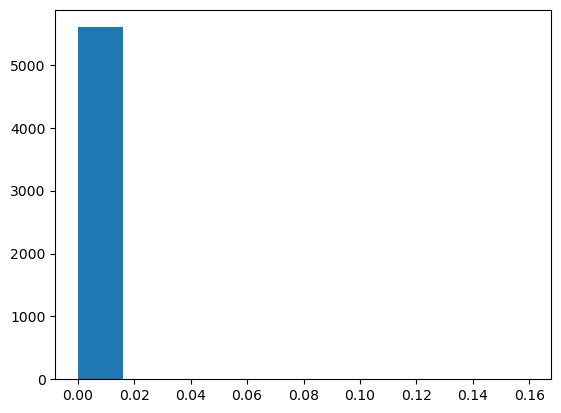

In [42]:
plt.hist(similarities)
plt.show()

In [23]:
similarity_index = similarities.MatrixSimilarity(corpus_question)
similarities = similarity_index[new_doc_topics]
sorted_similarities = sorted(enumerate(similarities), key=lambda item: -item[1])
for doc_index, similarity in sorted_similarities:
    print(f"Document {doc_index}: Similarity = {similarity:.4f}")

Document 4271: Similarity = 0.1598
Document 2249: Similarity = 0.1520
Document 0: Similarity = 0.1022
Document 3098: Similarity = 0.0859
Document 1809: Similarity = 0.0583
Document 149: Similarity = 0.0573
Document 1459: Similarity = 0.0546
Document 2317: Similarity = 0.0521
Document 2315: Similarity = 0.0479
Document 1493: Similarity = 0.0419
Document 1782: Similarity = 0.0397
Document 2318: Similarity = 0.0397
Document 4439: Similarity = 0.0348
Document 2319: Similarity = 0.0346
Document 862: Similarity = 0.0321
Document 2316: Similarity = 0.0301
Document 2320: Similarity = 0.0284
Document 3799: Similarity = 0.0239
Document 21: Similarity = 0.0221
Document 3102: Similarity = 0.0213
Document 3022: Similarity = 0.0191
Document 863: Similarity = 0.0190
Document 755: Similarity = 0.0189
Document 5322: Similarity = 0.0175
Document 3768: Similarity = 0.0173
Document 3625: Similarity = 0.0165
Document 2037: Similarity = 0.0162
Document 4813: Similarity = 0.0138
Document 4904: Similarity = 0

In [31]:
len(similarities)

5625

In [39]:
weight = []
print(f'{new_doc}\n')
for i in range(len(sims)):
    weight.append(sims[i]+similarities[i])
sorted_weight = sorted(enumerate(weight), key=lambda item: -item[1])
for doc_index, weight in sorted_weight:
    print(f"Document {doc_index}: weight_similarity = {weight:.4f}")
    print(f"question: {data.question[doc_id]}")
    print(f"answer: {data.answer[doc_id]}")

ดิฉันมีเรื่องปรึกษาเกี่ยวกับคดีครอบครัวคือว่าดิฉันพอเข้าใจเกี่ยวกับสินสมรสสินส่วนตัวอยู่บ้างแต่ยังต้องการทราบข้อเท็จจริงและวิธีการปฎิบัติดังนี้ดิฉันมีเงินเก็บก่อนสมรสอยู่ล้านบาทถือว่าเป็นสินส่วนตัวแต่เมื่อสมรสแล้วดอกเบี้ยจากเงินฝากก็เป็นสินสมรสแต่ดิฉันสามารถทำข้อตกลงหรือสัญาสลักหลังทะเบียนสมรสได้มั้ยว่าดอกเบี้ยที่เกิดขึ้นทั้งหมดระหว่างสมรสกันอยู่ให้ถือว่าเป็นสินส่วนตัวของดิฉันแต่เพียงผู้เดียวถ้าทำได้และสามียินยอมเซ็นต์ด้วยต่อมาสามีจะบอกเลิกหรือบอกล้างได้มั้ยระหว่างที่ยังสมรสกันอยู่ตอนนี้ดิฉันเป็นแม่บ้านไม่มีรายได้สามีมีรายได้บาทต่อเดือนอย่างนี้ดิฉันจะอ้างสิทธิว่าเป็นสินสมรสขอแบ่งจากสามีคนละครึ่งทุกเดือนได้มั้ยและถ้าสามีไม่ยอมดิฉันสามารถดำเนินการร้องขอต่อศาลหรือมีกฎหมายมาตราไหนเปิดช่องให้ทำได้บ้างรบกวนขอเลขมาตรากฎหมายเพื่ออ้างอิงและศึกษาด้วยต้องขอโทษด้วยที่อาจดูเห็นแก่ตัวแต่ไม่อยากให้สามีเอาเงินไปให้หญิงอื่นมาก

Document 4271: weight_similarity = 1.1453
question: เราตกลงหย่าขาดจากกันและมีสัญญาตามใบหย่าว่าถ้าขายที่ดินและนำเงินมาแบ่งกันถ้าเรายอมหย่าให้ซึ่งที่ดินเป็นชื่อของสามีคนเดี่ยวพอหย

6414
